In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [4]:
run1 = RunManager('StatArbStrategy', 'run_0127')

In [5]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.437243,0.038948,-999.0
1,data_rank_flag,True,144,0.542453,0.049111,-999.0
2,drop_binaries,False,144,0.501813,0.045203,-999.0
3,drop_binaries,True,144,0.477883,0.042856,-999.0
4,holding_period,3,96,0.641616,0.055779,-999.0
5,holding_period,5,96,0.455610,0.041417,-999.0
6,holding_period,7,96,0.372317,0.034892,-999.0
7,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.489848,0.044030,-999.0
8,per_side_count,10,144,0.521130,0.040479,-999.0
9,per_side_count,20,144,0.458566,0.047580,-999.0


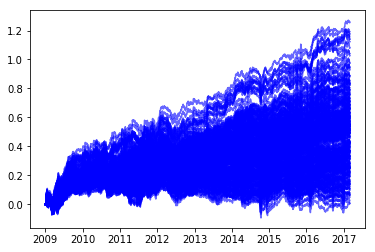

In [6]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum(), 'b', alpha=0.6)
plt.show()

# Combo Search

In [6]:
comb = CombinationSearch()
comb.set_selection_criteria('min_mean_sharpe_dd')
comb.params['training_epochs'] = 2
comb.add_run(run1)
comb.start()

Reading and aggregating runs...


  0%|          | 0/2 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 2/2 [01:09<00:00, 34.89s/it]


In [9]:
comb2 = CombinationSearch()
comb2.set_selection_criteria('mean')
comb2.params['training_epochs'] = 2
comb2.add_run(run1)
comb2.start()

  0%|          | 0/2 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 2/2 [00:16<00:00,  8.49s/it]


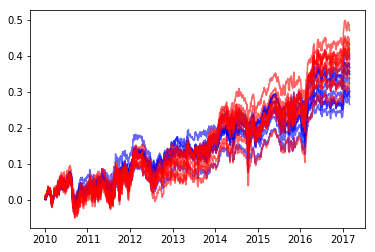

In [10]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum(), 'b', alpha=0.6)
plt.plot(comb2.best_results_returns.cumsum(), 'r', alpha=0.6)
plt.show()

## PairSearch

In [12]:
p = PairSearch()
p.params['training_epochs'] = 2
p.add_run(run1)
p.start()

  0%|          | 0/2 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 2/2 [01:25<00:00, 43.14s/it]


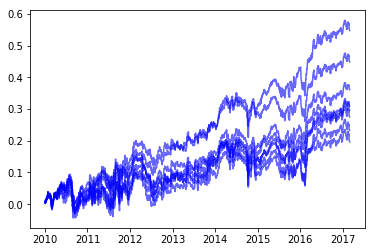

In [13]:
plt.figure()
plt.plot(p.best_results_returns.cumsum(), 'b', alpha=0.6)
plt.show()

# Momentum

In [11]:
run2 = RunManager('StatArbStrategy', 'run_0133')
run3 = RunManager('StatArbStrategy', 'run_0137')

In [12]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,144,0.314571,0.028819,-999.0
1,drop_binaries,False,144,0.314571,0.028819,-999.0
2,holding_period,3,48,0.463966,0.041385,-999.0
3,holding_period,5,48,0.272380,0.025142,-999.0
4,holding_period,7,48,0.207367,0.019931,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",144,0.314571,0.028819,-999.0
6,momentum_flag,False,72,0.453849,0.040482,-999.0
7,momentum_flag,True,72,0.175293,0.017156,-999.0
8,per_side_count,10,72,0.322290,0.025574,-999.0
9,per_side_count,20,72,0.306852,0.032065,-999.0


In [13]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,288,0.372006,0.036897,-999.0
1,drop_binaries,False,288,0.372006,0.036897,-999.0
2,holding_period,3,96,0.500415,0.046226,-999.0
3,holding_period,5,96,0.332618,0.033719,-999.0
4,holding_period,7,96,0.282984,0.030745,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.372006,0.036897,-999.0
6,momentum_var,0.002,72,0.306733,0.033983,-999.0
7,momentum_var,0.005,72,0.342092,0.035747,-999.0
8,momentum_var,0.01,72,0.385349,0.037375,-999.0
9,momentum_var,None,72,0.453849,0.040482,-999.0


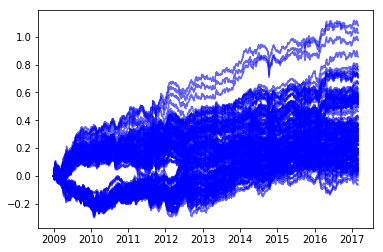

In [15]:
plt.figure()
plt.plot(run2.returns.dropna().cumsum(), 'b', alpha=0.6)
plt.show()

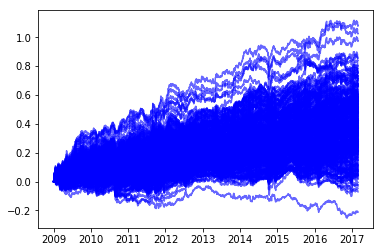

In [16]:
plt.figure()
plt.plot(run3.returns.dropna().cumsum(), 'b', alpha=0.6)
plt.show()